# Transit duration

In this notebook we calculate an estimate for the maximum duration of transit.

The maximum duration of a transit, $\Delta T$, for a single object on a near parabolic orbit is given by the equation:

$\Delta T \lesssim {\sqrt{2} R_*}/{\sqrt{Q \times dv_r/dt}}$

where $\Delta T$ is the maximum transit duration, $R_*$ the radius of the star, $Q$ the periastron distance and $dv_r/dt$ the acceleration.

To do this calculation we need $Q$. The acceleration $dv_r/dt$ we get from our fit to the data. 

## Calculating the periastron distance and longitude

Periastron distance and longitude. Assuming that each exocomet exhibits a near parabolic orbit, an estimate of the distance to the star, together with the measurement of the radial velocity at the time of the transit, allows an estimation of the periastron orientation and distance. We define $\bar{\omega}$ to be the longitude of the periastron, which is the true anomaly of the line of sight with respect to the exocomet's periastron, and $Q$ to be the periastron distance in units of stellar radius, $R_\star$ . These two quantities can be expressed with respect to the distance and the radial velocity by solving:

$$v_r = \sqrt{\frac{GM_\star}{d R_\star}}\frac{sin\bar{\omega}}{\sqrt{1+cos\bar{\omega}}}$$

and

$$d=\frac{2Q}{1+cos\omega}$$

For this calculation we use equations (22) from Kiefer et al. (2014).

In [1]:
import math as m
import numpy as np
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def w_ave(x, xerr):
    # Given an array of values and corresponding uncertainty
    # we can use this function to calculate the weighted average.
    weights = 1./(xerr**2)
    w_ave   = np.average(x, axis=0, weights=weights)
    uncertainty = 1/np.sum(weights)*np.sqrt(np.sum((weights*xerr)**2))
    return w_ave, uncertainty

In [2]:
R = 1.8*const.R_sun # The radius of beta Pic
G = const.G # Gravitational constant
M = 2*const.M_sun # The mass of beta Pic
v = 110 * u.km / u.second # From our data
d = 7.4*R # From our data (calculated using a = GM/d^2)
d_uncertainty = 2.9*R # From our data
dvdt = 2.7*u.meter/u.second**2 # From our data (calculated by measuring the slope of speed vs time)
dvdt_uncertainty = 0.6*u.meter/u.second**2 # From our data

omega = 0.96


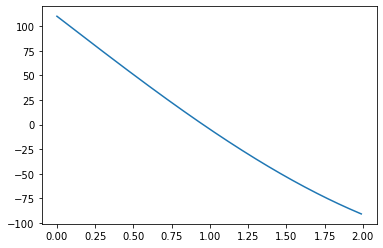

In [3]:
# We solve the quation for vr given above

func = lambda omega : v - (np.sqrt(G*M/(d))*np.sin(omega)/np.sqrt(1 + np.cos(omega)))

omega = np.arange(0,2,0.01)

initial_guess = 1.2

omega_solution = fsolve(func, initial_guess)[0]

plt.plot(omega, func(omega))
print("omega =",round(omega_solution,2))

In [4]:
Q = (d*(1+np.cos(omega_solution))/2.)
print("Q =",round((Q/R).value,2),"R*")

Q = 5.84 R*


In [5]:
print("Dist confidence:",round((d/d_uncertainty).value,1),"sigma")
print("Acceleration confidence:",round((dvdt/dvdt_uncertainty).value,1),"sigma")

Dist confidence: 2.6 sigma
Acceleration confidence: 4.5 sigma


In [6]:
dT = np.sqrt(2)*R/np.sqrt(Q*dvdt)
dT_err = 1./(np.sqrt((d/d_uncertainty))+np.sqrt(dvdt/dvdt_uncertainty))
print("Maximum transit duration:",round(dT.to(u.hour).value,1),"±",round(dT_err.value,1),"hours")

Maximum transit duration: 3.5 ± 0.3 hours


In [35]:
# Setting the parameters for the plots
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

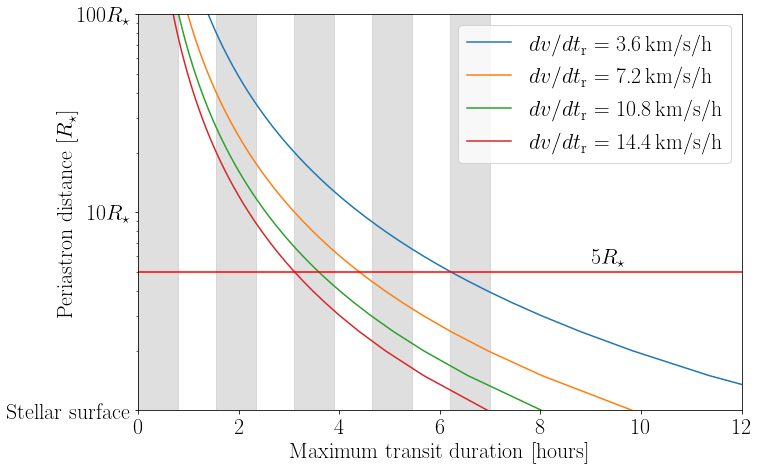

In [217]:
#fig = plt.figure(figsize=(10.0,6.0))
fig, ax = plt.subplots(figsize=(11.0,7.0))

for i in range(5):
    plt.axvspan(i*1.55,0.80+i*1.55, alpha=0.5, color='#C0C0C0')


'''
q_vals = np.arange(2,6)*R
dvdt_range = np.arange(0.1,11,0.1)
dT = np.sqrt(2)*R/np.sqrt(1*R*dvdt_range)
plt.plot(dT/3600,dvdt_range,label='Stellar surface',color='red')

for j in range(len(q_vals)):
    dT = np.sqrt(2)*R/np.sqrt(q_vals[j]*dvdt_range)
    plt.plot(dT/3600,dvdt_range,label='q = '+str(q_vals[j]/R)+'R$_\star$')

plt.xlabel(r'Maximum transit duration [hours]')
plt.ylabel(r'Exocometary acceleration in m/s$^2$')
'''

q_range = np.arange(1,100,0.5)*R
dvdt_range = np.arange(1.0,5,1)

for j in range(len(dvdt_range)):
    dT = np.sqrt(2)*R/np.sqrt(q_range*dvdt_range[j])
    plt.plot(dT/3600,q_range/R,label=r'$dv/dt_\mathrm{r}$ = '+str(dvdt_range[j]*(3600/1000))+'\,km/s/h')

plt.axhline(y = 5.0, color = 'r', linestyle = '-')
plt.legend(loc='upper right', numpoints=1)
plt.xlabel(r'Maximum transit duration [hours]')
plt.ylabel(r'Periastron distance $[R_\star]$')
plt.text(9,5.5,r'5$R_\star$')
plt.xlim(0,12)
plt.ylim(1,100)
plt.yscale('log')
ax.yaxis.set_label_coords(-.1, .5)
plt.gca().set_yticks([1,10,100]) 
plt.gca().set_yticklabels(['Stellar surface',r'10$R_\star$',r'100$R_\star$'])
fig.tight_layout()
plt.savefig('curves.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)

### Should you want to do a weighted average you can use the following:

In [7]:
dist        = np.array([8.3,7.1])
dist_err    = np.array([2.8,2.2])

dvdt        = np.array([2.1,2.9])
dvdt_err    = np.array([0.7,0.9])

dist_w_ave, dist_uncertainty = w_ave(dist, dist_err)
dvdt_w_ave, dvdt_uncertainty = w_ave(dvdt, dvdt_err)

print("Distance from star:",round(dist_w_ave,1),"±",round(dist_uncertainty,1),"R*")
print("Confidence:",round(dist_w_ave/dist_uncertainty,1),"sigma")

print("\nAcceleration:",round(dvdt_w_ave,1),"±",round(dvdt_uncertainty,1),"m/s^2")
print("Confidence:",round(dvdt_w_ave/dvdt_uncertainty,1),"sigma")

Distance from star: 7.6 ± 1.7 R*
Confidence: 4.4 sigma

Acceleration: 2.4 ± 0.6 m/s^2
Confidence: 4.3 sigma
